# Library and pip install

In [1]:
!pip install datasets
!pip install matplotlib transformers segmentation-models-pytorch torch torchvision
!pip install wandb
!pip install torchviz

# Import libraries
import wandb
wandb.login()

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import Grayscale
import numpy as np
import segmentation_models_pytorch as smp
from transformers import AutoConfig, AutoModelForImageSegmentation
import torch.nn.functional as F
from sklearn.decomposition import PCA
from torchviz import make_dot
from IPython.display import display


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=07b4cd540e2a097765b27b95dede7325d1b9feb5232e00f82a7ddca9e8e6d358
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=7dad136c38d1674739de59249d37a2cf131432de2

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Load the dataset

In [2]:
# subset_size_train = 1000

# Load the dataset
dataset_full_train = load_dataset('benschill/brain-tumor-collection', split='train')
dataset_full_test = load_dataset('benschill/brain-tumor-collection', split='test')

dataset_train = dataset_full_train
# dataset_train = dataset_full_train.select(range(subset_size_train))
dataset_test = dataset_full_test

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for benschill/brain-tumor-collection contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/benschill/brain-tumor-collection
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major

Test/root/.cache/huggingface/datasets/downloads/extracted/7aafa170c9a8700e090d9bea81d8e7265fef14341f0329e79184db97321057e2


Generating train split: 0 examples [00:00, ? examples/s]

                                                   file             label
0     /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
1     /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
2     /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
3     /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
4     /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
...                                                 ...               ...
2865  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
2866  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
2867  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
2868  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
2869  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor

[2870 rows x 2 columns]


Generating test split: 0 examples [00:00, ? examples/s]

                                                  file             label
0    /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
1    /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
2    /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
3    /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
4    /root/.cache/huggingface/datasets/downloads/ex...  Meningioma Tumor
..                                                 ...               ...
389  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
390  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
391  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
392  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor
393  /root/.cache/huggingface/datasets/downloads/ex...   Pituitary Tumor

[394 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for benschill/brain-tumor-collection contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/benschill/brain-tumor-collection
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
# Checking the dimensions of the first image in the training dataset
first_image = dataset_train[0]['image']
image_dimensions = first_image.size  # PIL images use size attribute for dimensions

print("Image Dimensions:", image_dimensions)

Image Dimensions: (512, 512)


# Check some images

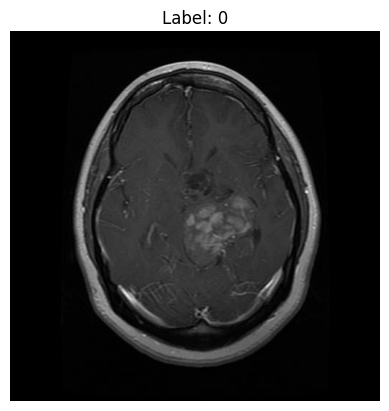

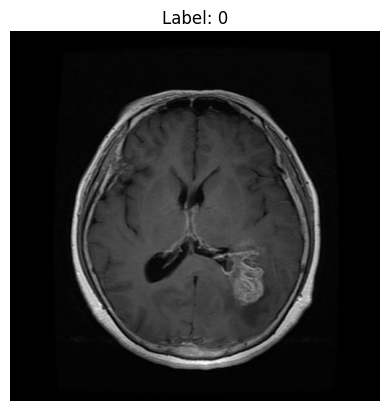

In [4]:
# Function to display a single image
def show_image(image, label):
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# Display the first couple of images from the dataset
for i in range(2):  # Adjust this range to display more images
    image_data = dataset_train[i]
    show_image(image_data['image'], image_data['label'])

In [5]:
def get_dataloader(dataset, batch_size=32):
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize images to 128x128
        Grayscale(num_output_channels=1),  # Convert images to grayscale
        transforms.ToTensor()
    ])
    dataset = [(transform(img['image']), img['label']) for img in dataset]
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [6]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Encoder layers
        self.enc_conv1 = nn.Conv2d(1, 32, 3, stride=2, padding=1) #64
        self.enc_bn1 = nn.BatchNorm2d(32)
        self.enc_conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1) #32
        self.enc_bn2 = nn.BatchNorm2d(64)
        self.enc_conv3 = nn.Conv2d(64, 128, 3, stride=2, padding=1) #16
        self.enc_bn3 = nn.BatchNorm2d(128)
        self.enc_conv4 = nn.Conv2d(128, 256, 3, stride=2, padding=1) #8
        self.enc_bn4 = nn.BatchNorm2d(256)
        self.enc_conv5 = nn.Conv2d(256, 512, 3, stride=2, padding=1) #4
        self.enc_bn5 = nn.BatchNorm2d(512)

        # Calculate the flatten size
        self.flatten_size = 512 * (128 // 32) * (128 // 32)
        self.fc1 = nn.Linear(self.flatten_size, self.latent_dim)

        # Decoder layers
        self.fc2 = nn.Linear(self.latent_dim, self.flatten_size)
        self.dec_conv1 = nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1)
        self.dec_bn1 = nn.BatchNorm2d(256)
        self.dec_conv2 = nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1)
        self.dec_bn2 = nn.BatchNorm2d(128)
        self.dec_conv3 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.dec_bn3 = nn.BatchNorm2d(64)
        self.dec_conv4 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.dec_bn4 = nn.BatchNorm2d(32)
        self.dec_conv5 = nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1)

    def forward(self, x, return_intermediate=True):
        # Encoder forward
        e1 = F.leaky_relu(self.enc_bn1(self.enc_conv1(x)), 0.01)
        e2 = F.leaky_relu(self.enc_bn2(self.enc_conv2(e1)), 0.01)
        e3 = F.leaky_relu(self.enc_bn3(self.enc_conv3(e2)), 0.01)
        e4 = F.leaky_relu(self.enc_bn4(self.enc_conv4(e3)), 0.01)
        e5 = F.leaky_relu(self.enc_bn5(self.enc_conv5(e4)), 0.01)

        z = self.fc1(e5.view(-1, self.flatten_size))

        # Decoder forward
        z = self.fc2(z)
        z = z.view(-1, 512, 128 // 32, 128 // 32)
        d1 = F.leaky_relu(self.dec_bn1(self.dec_conv1(z)), 0.01)
        d2 = F.leaky_relu(self.dec_bn2(self.dec_conv2(d1)), 0.01)
        d3 = F.leaky_relu(self.dec_bn3(self.dec_conv3(d2)), 0.01)
        d4 = F.leaky_relu(self.dec_bn4(self.dec_conv4(d3)), 0.01)
        d5 = torch.sigmoid(self.dec_conv5(d4))

        if return_intermediate:
            return d5, [e1, e2, e3, e4, e5, d1, d2, d3, d4]
        else:
            return d5

In [7]:
# def define_sweep_config():
#     sweep_config = {
#         'method': 'bayes',  # or 'grid', 'bayes'
#         'metric': {
#             'name': 'loss',
#             'goal': 'minimize'
#         },
#         'parameters': {
#             'learning_rate': {
#                 'values': [5e-4, 1e-4]
#             },
#             'epochs': {
#                 'values': [10, 20, 40]
#             },
#             'batch_size': {
#                 'values': [16, 32, 64]
#             },
#             'latent_dim': {
#                 'values': [512, 1024, 2048]
#             }
#         }
#     }
#     return sweep_config

In [8]:
def define_sweep_config():
    sweep_config = {
        'method': 'bayes',  # or 'grid', 'random'
        'metric': {
            'name': 'loss',
            'goal': 'minimize'
        },
        'parameters': {
            'learning_rate': {
                'values': [5e-4]
            },
            'epochs': {
                'values': [40]
            },
            'batch_size': {
                'values': [16]
            },
            'latent_dim': {
                'values': [128, 256, 512]
            }
        }
    }
    return sweep_config

In [9]:
def train_AE(model, dataloader, optimizer, device, config):
    model.to(device)
    model.train()
    for epoch in range(config.epochs):
        total_loss = 0
        for data in dataloader:
            img, _ = data
            img = img.to(device)
            optimizer.zero_grad()
            recon_batch, _ = model(img)
            loss = nn.functional.mse_loss(recon_batch, img)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch}, Average Loss: {average_loss}")
        wandb.log({"epoch": epoch, "Average_loss": average_loss})


In [10]:
def visualize_reconstruction(model, dataloader, device, model_name="Model", num_images=5):
    model.eval()
    with torch.no_grad():
        for i, (img, _) in enumerate(dataloader):
            if i == 1:
                img = img.to(device)
                recon = model(img, return_intermediate=False)  # Get only the reconstructed images
                img = img.cpu()
                recon = recon.cpu()

                # Plot original and reconstructed images
                fig, axes = plt.subplots(2, num_images, figsize=(10, 4))
                fig.suptitle(f'{model_name}')  # Adding a title with the model name
                for j in range(num_images):
                    # Display original
                    axes[0, j].imshow(img[j].squeeze(), cmap='gray')
                    axes[0, j].set_title('Original')
                    axes[0, j].axis('off')

                    # Display reconstruction
                    axes[1, j].imshow(recon[j].squeeze(), cmap='gray')
                    axes[1, j].set_title('Reconstructed')
                    axes[1, j].axis('off')
                plt.show()
                break

In [11]:
def visualize_intermediate_layers(model, dataloader, device, num_images=5):
    model.eval()
    with torch.no_grad():
        for img, _ in dataloader:
            img = img.to(device)
            recon, layers = model(img)  # Correct unpacking
            img = img.cpu()
            recon = recon.cpu()

            # Assuming first 5 layers are encoder and next 5 are decoder
            encoder_outputs = layers[:5]
            decoder_outputs = layers[5:]

            encoder_layer_names = ['enc_conv1', 'enc_conv2', 'enc_conv3', 'enc_conv4', 'enc_conv5']
            decoder_layer_names = ['dec_conv1', 'dec_conv2', 'dec_conv3', 'dec_conv4']

            # Calculate total number of layers for plotting
            num_layers = len(encoder_outputs) + len(decoder_outputs) + 2
            fig, axes = plt.subplots(num_layers, num_images, figsize=(10, 2 * num_layers))
            # fig.suptitle('Autoencoder Layers Visualization')

            # Display original images
            for j in range(num_images):
                axes[0, j].imshow(img[j].squeeze(), cmap='gray')
                axes[0, j].set_title('Original')
                axes[0, j].axis('off')

            # Display encoder and decoder layer outputs
            for i in range(len(encoder_outputs)):
                for j in range(num_images):
                    output = encoder_outputs[i][j].detach().cpu()
                    if output.size(0) > 1:
                        output = output.mean(dim=0)
                    axes[i + 1, j].imshow(output.squeeze(), cmap='gray')
                    axes[i + 1, j].set_title(encoder_layer_names[i])
                    axes[i + 1, j].axis('off')

            for i in range(len(decoder_outputs)):
                for j in range(num_images):
                    output = decoder_outputs[i][j].detach().cpu()
                    if output.size(0) > 1:
                        output = output.mean(dim=0)
                    axes[i + 1 + len(encoder_outputs), j].imshow(output.squeeze(), cmap='gray')
                    axes[i + 1 + len(encoder_outputs), j].set_title(decoder_layer_names[i])
                    axes[i + 1 + len(encoder_outputs), j].axis('off')

            # Display reconstructed images
            for j in range(num_images):
                axes[num_layers - 1, j].imshow(recon[j].squeeze(), cmap='gray')
                axes[num_layers - 1, j].set_title('Reconstructed')
                axes[num_layers - 1, j].axis('off')

            plt.show()
            break  # Only show the first batch


In [12]:
def main():

    wandb.init()
    config = wandb.config

    # Check for CUDA availability
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Initialize model and optimizer using W&B config
    latent_dim = wandb.config.latent_dim

    # Model selection
    ae = Autoencoder(latent_dim=latent_dim)
    optimizer = optim.Adam(ae.parameters(), lr=wandb.config.learning_rate)

    # Get data loaders
    train_loader = get_dataloader(dataset_train, batch_size=wandb.config.batch_size)
    test_loader = get_dataloader(dataset_test, batch_size=wandb.config.batch_size)

    # Train the model
    train_AE(ae, train_loader, optimizer, device, wandb.config)

    # Visualize some reconstructed images
    visualize_reconstruction(ae, test_loader, device, model_name="Autoencoder")

    # Visualize intermediate layers and reconstructed images
    visualize_intermediate_layers(ae, test_loader, device)

    # Close the W&B run
    wandb.finish()

Create sweep with ID: 0kh2031o
Sweep URL: https://wandb.ai/yusuke-sugihara/UNITN-Project_AE_Opt/sweeps/0kh2031o


wandb: Agent Starting Run: zpzshash with config:
wandb: 	batch_size: 16
wandb: 	epochs: 40
wandb: 	latent_dim: 128
wandb: 	learning_rate: 0.0005
wandb: Currently logged in as: yusuke-sugihara. Use `wandb login --relogin` to force relogin


Using device: cuda
Epoch 0, Average Loss: 0.02995189192911817
Epoch 1, Average Loss: 0.014260623050439689
Epoch 2, Average Loss: 0.011946822439009944
Epoch 3, Average Loss: 0.010791984619572759
Epoch 4, Average Loss: 0.009443577940368817
Epoch 5, Average Loss: 0.008794505801051854
Epoch 6, Average Loss: 0.008205054105362958
Epoch 7, Average Loss: 0.007724229140310652
Epoch 8, Average Loss: 0.007379153029372295
Epoch 9, Average Loss: 0.006966379535798397
Epoch 10, Average Loss: 0.006634697933784789
Epoch 11, Average Loss: 0.006545294583257702
Epoch 12, Average Loss: 0.006229680662767754
Epoch 13, Average Loss: 0.005904756915859051
Epoch 14, Average Loss: 0.005790067846990294
Epoch 15, Average Loss: 0.00552394400195529
Epoch 16, Average Loss: 0.005527250168638097
Epoch 17, Average Loss: 0.005309171250296963
Epoch 18, Average Loss: 0.005039895510870135
Epoch 19, Average Loss: 0.005099468066408816
Epoch 20, Average Loss: 0.004834685475927674
Epoch 21, Average Loss: 0.004761296982825216
Epo

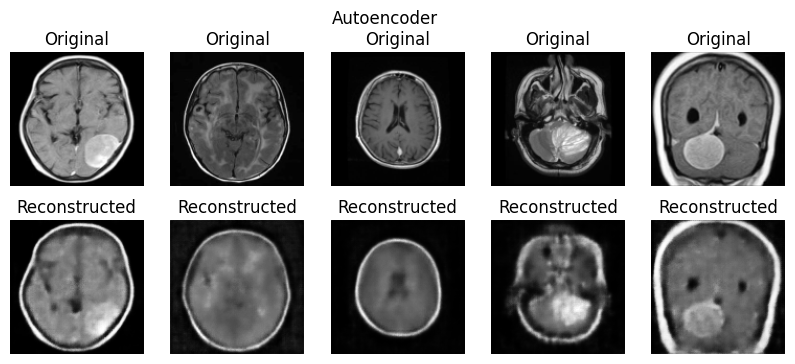

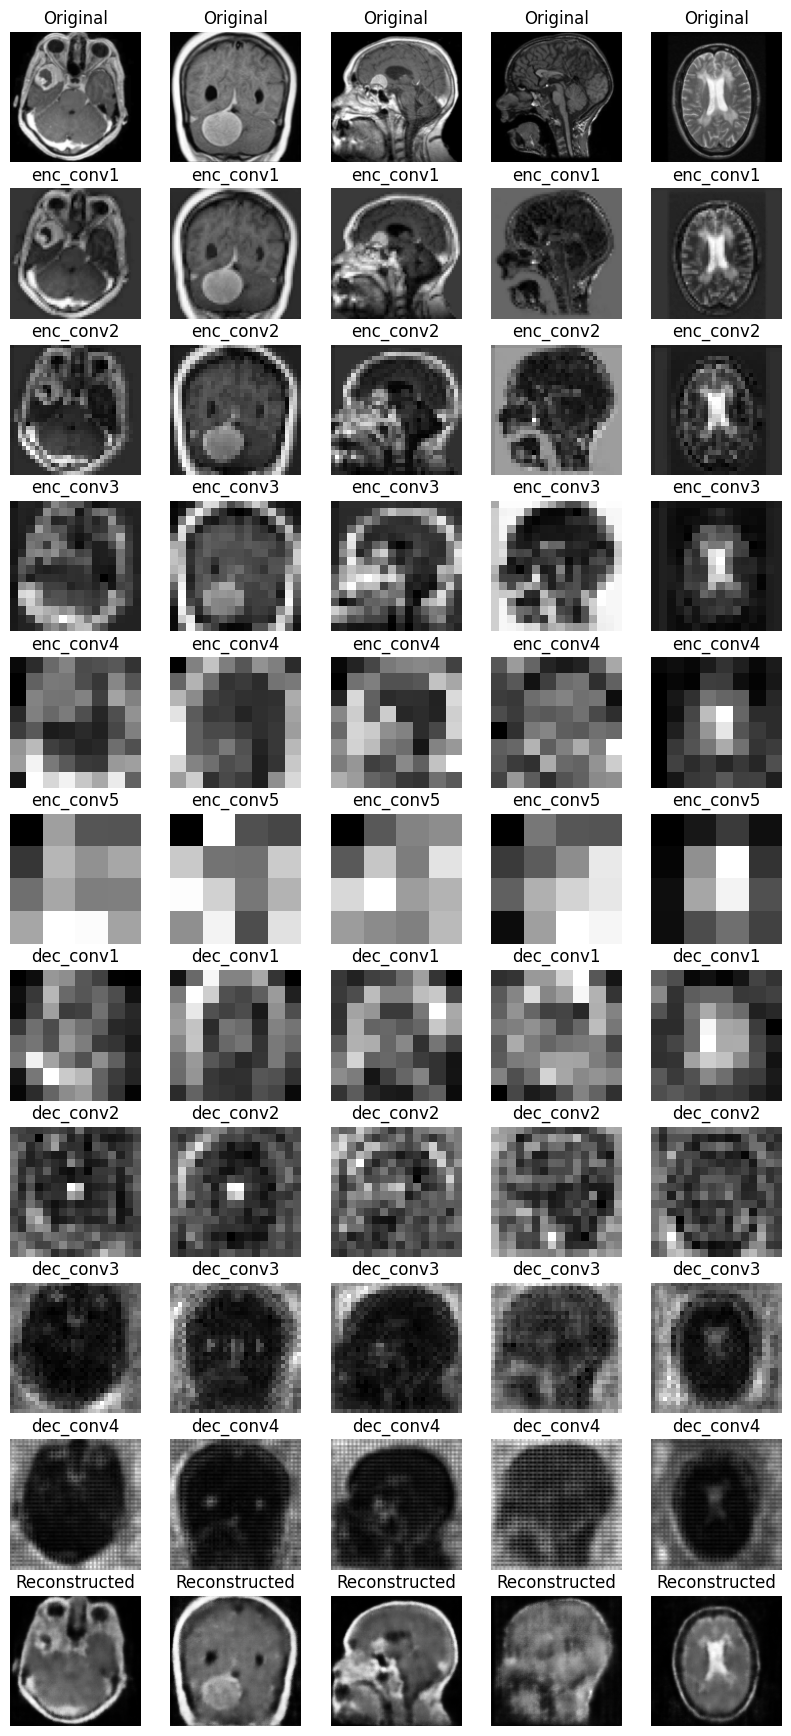

wandb: Agent Starting Run: 0n01v2f7 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 40
wandb: 	latent_dim: 512
wandb: 	learning_rate: 0.0005


Using device: cuda
Epoch 0, Average Loss: 0.027199476139826907
Epoch 1, Average Loss: 0.013472101645958093
Epoch 2, Average Loss: 0.011458357785724932
Epoch 3, Average Loss: 0.010399859282188118
Epoch 4, Average Loss: 0.00936930068095939
Epoch 5, Average Loss: 0.008790075528021487
Epoch 6, Average Loss: 0.008259791381553644
Epoch 7, Average Loss: 0.00804517510243588
Epoch 8, Average Loss: 0.007601259793672297
Epoch 9, Average Loss: 0.007256648622246252
Epoch 10, Average Loss: 0.007015937613323331
Epoch 11, Average Loss: 0.006890915523076223
Epoch 12, Average Loss: 0.006571977893407974
Epoch 13, Average Loss: 0.006415675262299677
Epoch 14, Average Loss: 0.006146644128279553
Epoch 15, Average Loss: 0.006045614871092968
Epoch 16, Average Loss: 0.00590438363659713
Epoch 17, Average Loss: 0.005635176280823846
Epoch 18, Average Loss: 0.005499461960668365
Epoch 19, Average Loss: 0.005456812534895208
Epoch 20, Average Loss: 0.005282954791457289
Epoch 21, Average Loss: 0.0051789567624736165
Epo

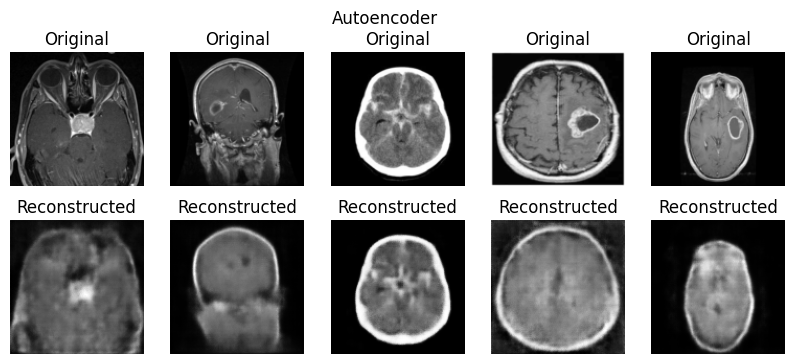

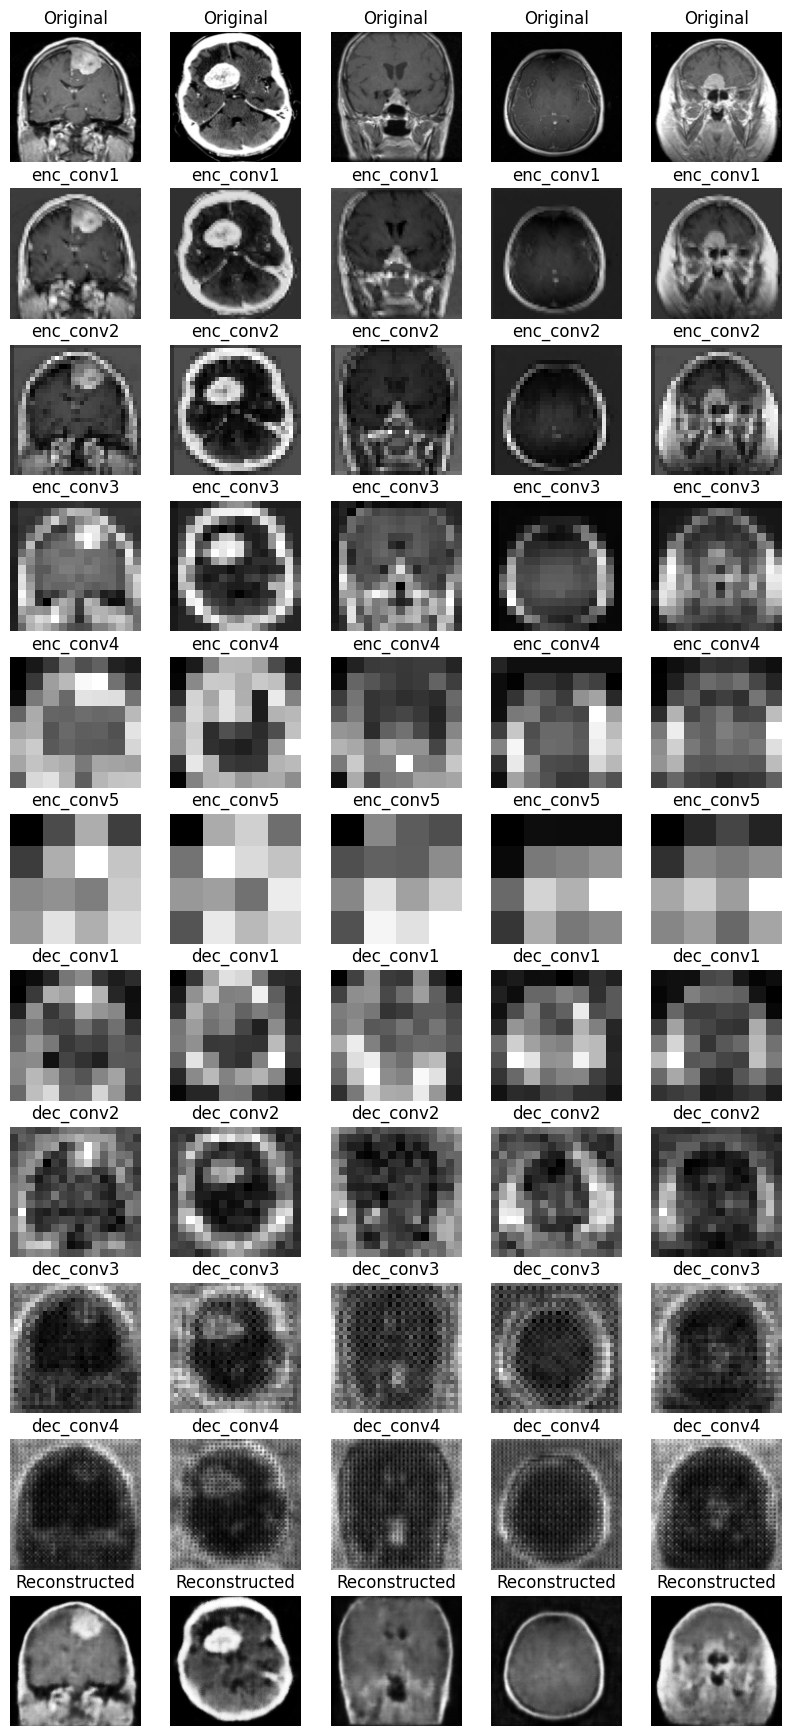

wandb: Agent Starting Run: 1dm1pow7 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 40
wandb: 	latent_dim: 256
wandb: 	learning_rate: 0.0005


Using device: cuda
Epoch 0, Average Loss: 0.05376918889168236
Epoch 1, Average Loss: 0.014977524398515622
Epoch 2, Average Loss: 0.012472371746682458
Epoch 3, Average Loss: 0.011016152643909058
Epoch 4, Average Loss: 0.009831573718434407
Epoch 5, Average Loss: 0.009332846588869062
Epoch 6, Average Loss: 0.008652863470423553
Epoch 7, Average Loss: 0.008008485023553173
Epoch 8, Average Loss: 0.007623514090664685
Epoch 9, Average Loss: 0.007326785138704711
Epoch 10, Average Loss: 0.00712637076050871
Epoch 11, Average Loss: 0.007048368262540963
Epoch 12, Average Loss: 0.006545485664779941
Epoch 13, Average Loss: 0.006321734898827142
Epoch 14, Average Loss: 0.006191461380674607
Epoch 15, Average Loss: 0.006093996486419605
Epoch 16, Average Loss: 0.005864096391532157
Epoch 17, Average Loss: 0.005651064067044192
Epoch 18, Average Loss: 0.005559426051978436
Epoch 19, Average Loss: 0.005387482603287531
Epoch 20, Average Loss: 0.0052737041958607735
Epoch 21, Average Loss: 0.005146520828000373
Ep

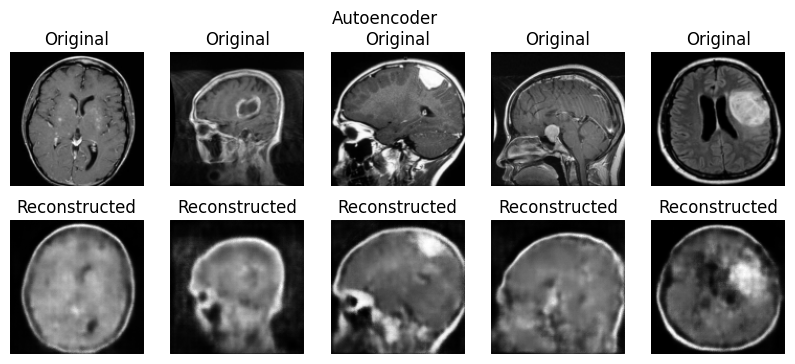

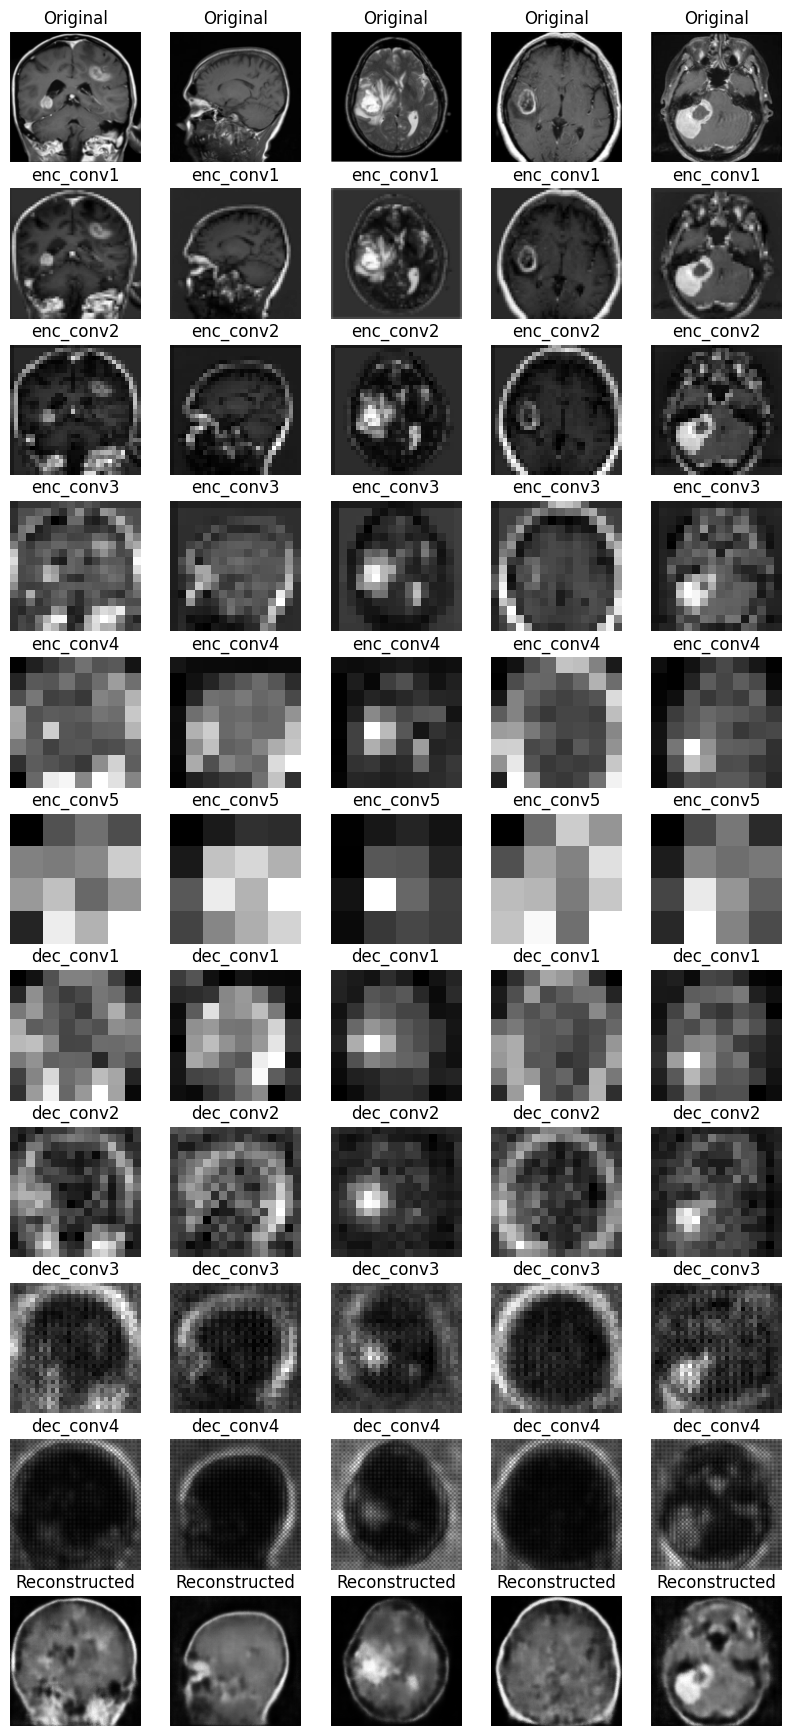

wandb: Agent Starting Run: 0wnsflbp with config:
wandb: 	batch_size: 16
wandb: 	epochs: 40
wandb: 	latent_dim: 512
wandb: 	learning_rate: 0.0005


Using device: cuda
Epoch 0, Average Loss: 0.030873418511408898
Epoch 1, Average Loss: 0.01361386243564387
Epoch 2, Average Loss: 0.011704890711957381
Epoch 3, Average Loss: 0.010380233881167239
Epoch 4, Average Loss: 0.009556576415585974
Epoch 5, Average Loss: 0.00908306865538988
Epoch 6, Average Loss: 0.008455608591126899
Epoch 7, Average Loss: 0.008013382458334996
Epoch 8, Average Loss: 0.007622605218138132
Epoch 9, Average Loss: 0.007557076872843835
Epoch 10, Average Loss: 0.007158718871263166
Epoch 11, Average Loss: 0.006902997068957322
Epoch 12, Average Loss: 0.0068123263022344975
Epoch 13, Average Loss: 0.0065713351721771885
Epoch 14, Average Loss: 0.006326117180287838
Epoch 15, Average Loss: 0.006263449154276814
Epoch 16, Average Loss: 0.006071060771743456
Epoch 17, Average Loss: 0.005732680802854399
Epoch 18, Average Loss: 0.0057416194571285615
Epoch 19, Average Loss: 0.005575896018288202
Epoch 20, Average Loss: 0.005416610285950204
Epoch 21, Average Loss: 0.005393070023920801


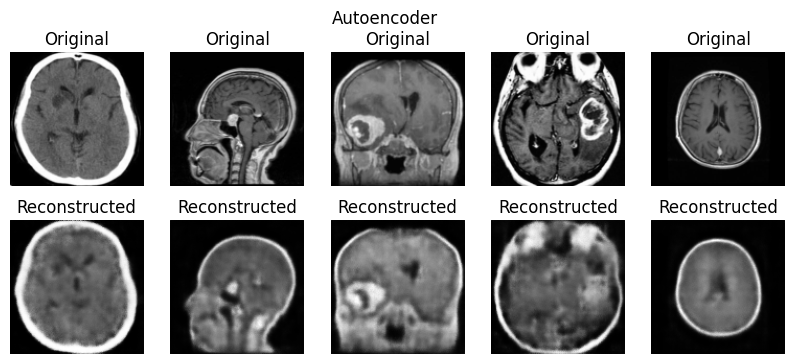

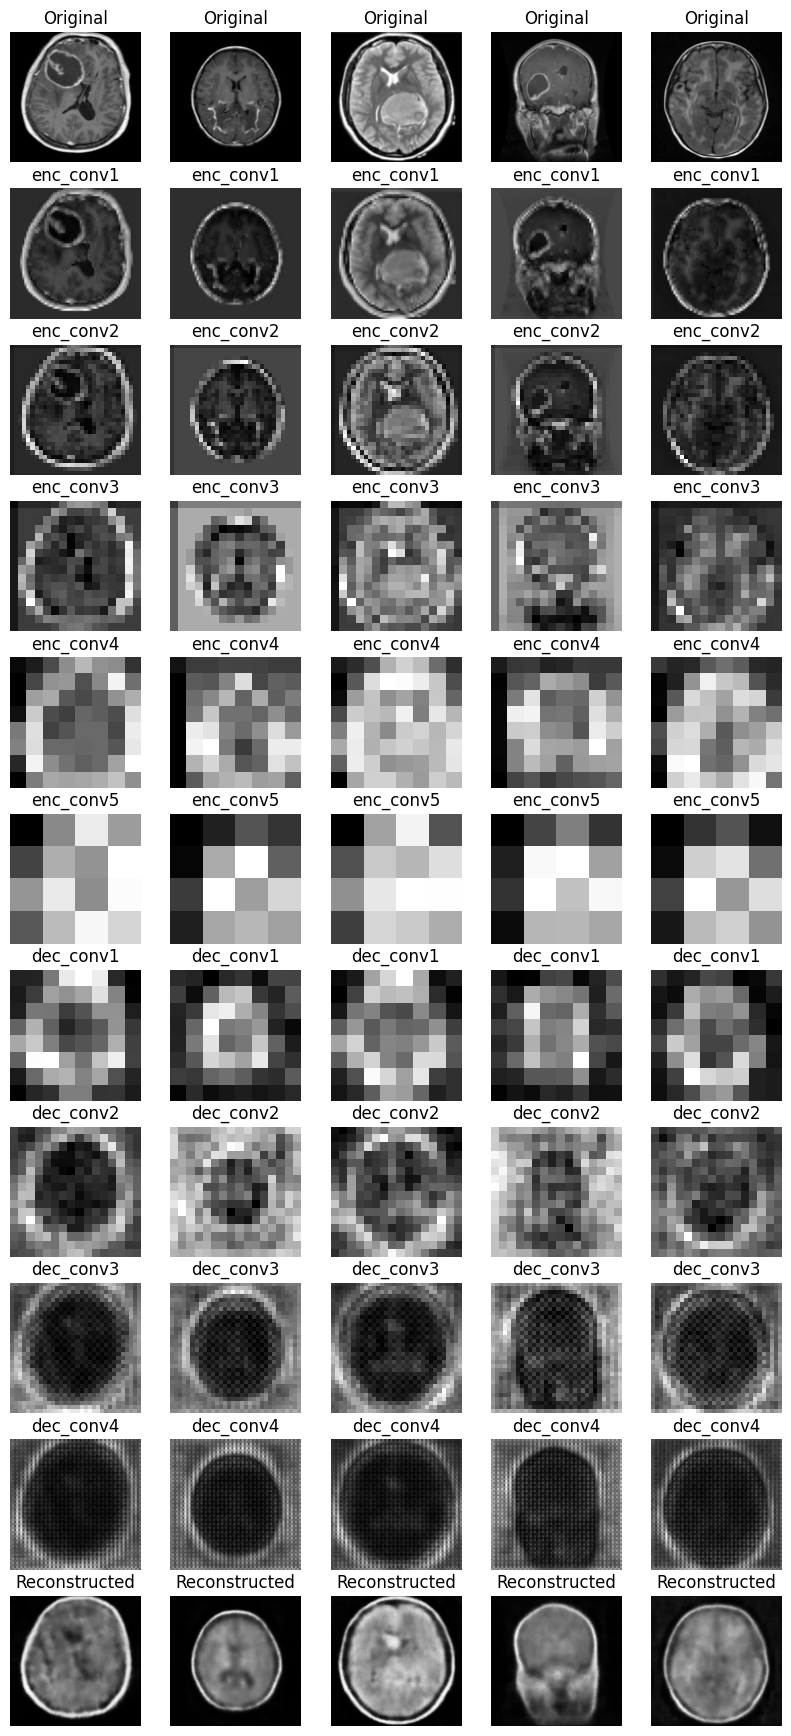

wandb: Agent Starting Run: e3748pep with config:
wandb: 	batch_size: 16
wandb: 	epochs: 40
wandb: 	latent_dim: 256
wandb: 	learning_rate: 0.0005


Using device: cuda
Epoch 0, Average Loss: 0.031156095748560295
Epoch 1, Average Loss: 0.014323587053351933
Epoch 2, Average Loss: 0.01192970540271037
Epoch 3, Average Loss: 0.01025915102671004
Epoch 4, Average Loss: 0.009426108905528155
Epoch 5, Average Loss: 0.008951297430838976
Epoch 6, Average Loss: 0.00810423416033801
Epoch 7, Average Loss: 0.007790101195375125
Epoch 8, Average Loss: 0.007567088611217009
Epoch 9, Average Loss: 0.007159168599173427
Epoch 10, Average Loss: 0.006839389289315376
Epoch 11, Average Loss: 0.006435658632674151
Epoch 12, Average Loss: 0.006247616748118566
Epoch 13, Average Loss: 0.006205111201335159
Epoch 14, Average Loss: 0.00591145864325679
Epoch 15, Average Loss: 0.005738434438697166
Epoch 16, Average Loss: 0.00554780626617786
Epoch 17, Average Loss: 0.005356662882129765
Epoch 18, Average Loss: 0.005286562385865384
Epoch 19, Average Loss: 0.005156387832377934
Epoch 20, Average Loss: 0.005040607840702351
Epoch 21, Average Loss: 0.004910588979772809
Epoch 

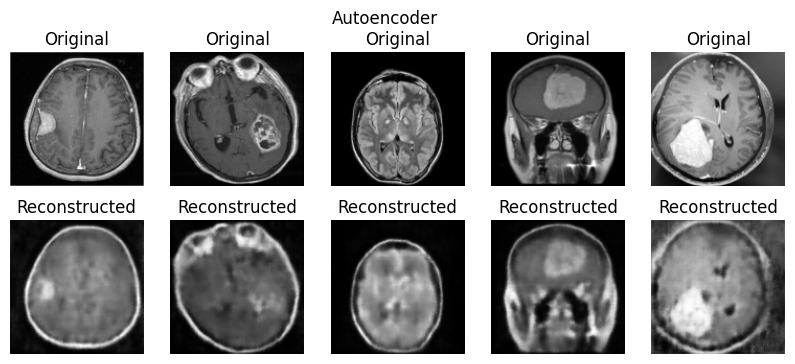

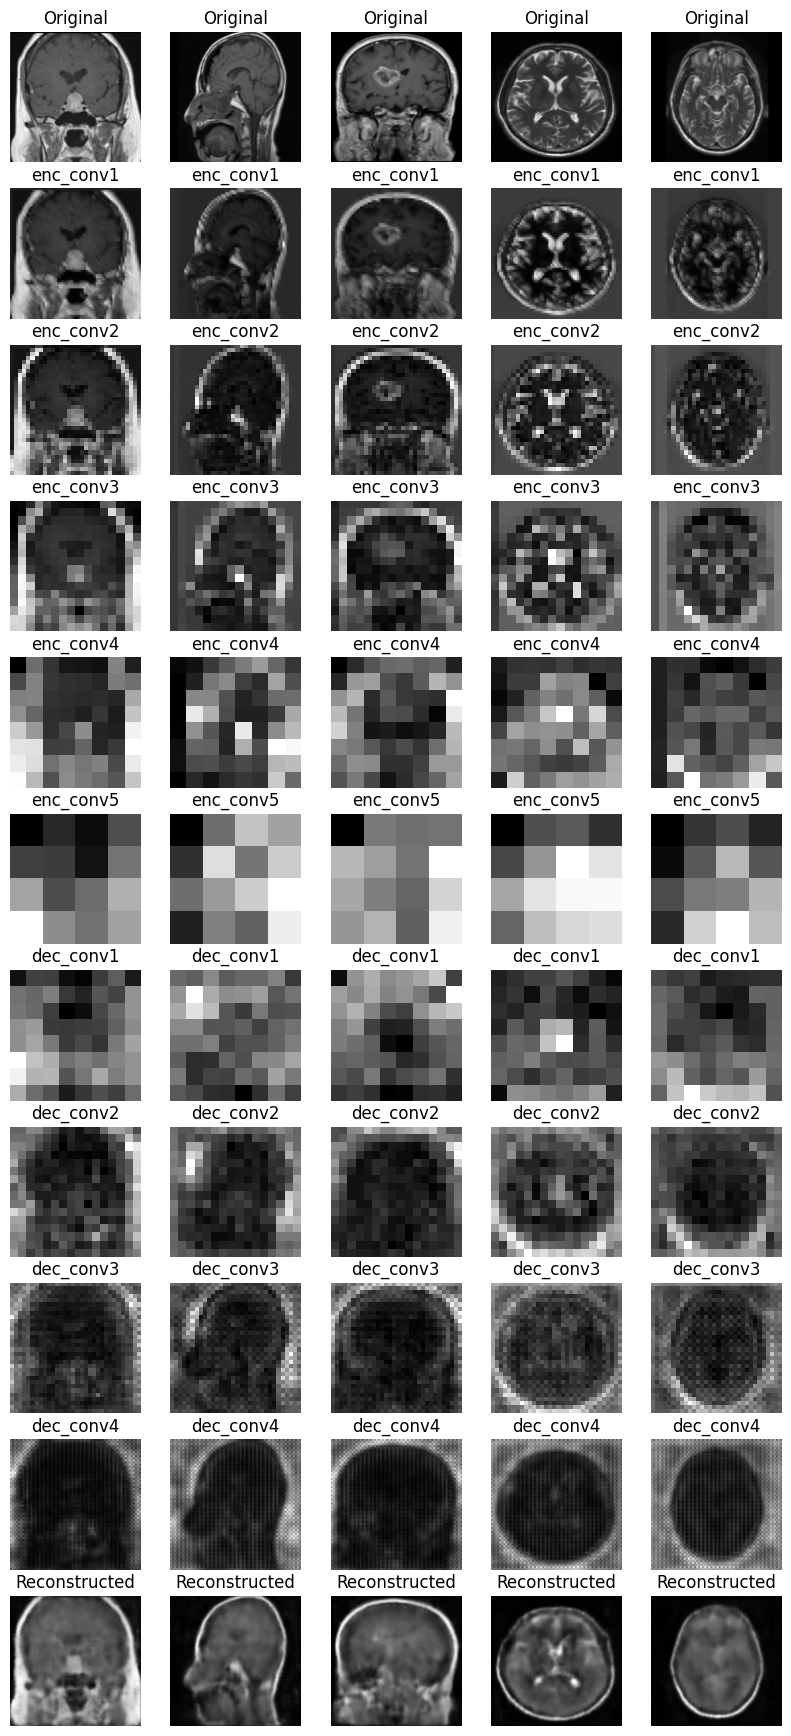

wandb: Agent Starting Run: w3wvmhyl with config:
wandb: 	batch_size: 16
wandb: 	epochs: 40
wandb: 	latent_dim: 512
wandb: 	learning_rate: 0.0005


Using device: cuda
Epoch 0, Average Loss: 0.02414568481552932
Epoch 1, Average Loss: 0.013800422805878851
Epoch 2, Average Loss: 0.011710037058219314
Epoch 3, Average Loss: 0.010323559404868218
Epoch 4, Average Loss: 0.009428256307728589


wandb: Ctrl + C detected. Stopping sweep.


In [13]:
if __name__ == "__main__":
    sweep_config = define_sweep_config()
    sweep_id = wandb.sweep(sweep_config, project="UNITN-Project_AE_Opt", entity="yusuke-sugihara")
    wandb.agent(sweep_id, main)